# Trabalho: Análise de Sentimento


1 - Classificar sentimento (positivo e negativo) na base de tweets a ser fornecida utilizando 3 métodos diferentes: 
- Dois métodos clássicos 
- Um método utilizando deep learning 


2 - Um método consiste em uma forma de vetorização (Contagem, vetor binário, TF-IDF, Embeddings, etc.) e um classificador 


3 - O grupo deverá comentar um pouco sobre os métodos utilizados (comentar sobre a vetorização e sobre o classificador) e fazer uma análise de cada método: 
- Acurácia 
- Precision 
- Recall 
- F-measure (F1 Score) 


4 - Fazer comparativo dos métodos utilizando os critérios acima. 
Qual o melhor? 
O que pode melhorar? 
Quais as vantagens e desvantagens de cada método. 


5 - O trabalho deve ser obrigatoriamente apresentado. Haverá sorteio do dia da apresentação e a ordem. 
No dia da apresentação, o grupo terá 15 min para apresentar o trabalho (será utilizado compartilhamento de tela com o grupo). 
O grupo pode utilizar qualquer recurso para facilitar a apresentação (slides, trechos de códigos, etc.)

## Carregar Dados

# Trabalho: Análise de Sentimento


## Importar Bibliotecas

In [1]:
from TratarDados import TratarDados
from VisualizarDados import VisualizarDados
from Treinamento import Treinamento
from DeepLearning import DeepLearning
from wordcloud import WordCloud
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB

visualizar_dados = VisualizarDados()
tratar_dados = TratarDados()
treinamento = Treinamento()
deep_learning = DeepLearning()


2021-08-15 16:54:06.791578: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-08-15 16:54:06.791602: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


## Importar dados do CSV

In [2]:
tweets = tratar_dados.importar_parcial(100)
tweets.head()

,Sentimento,Data,Usuario,Texto
800000,4,Mon Apr 06 22:22:45 PDT 2009,ersle,I LOVE @Health4UandPets u guys r the best!!
800001,4,Mon Apr 06 22:22:45 PDT 2009,becca210,im meeting up with one of my besties tonight! ...
800002,4,Mon Apr 06 22:22:46 PDT 2009,Wingman29,"@DaRealSunisaKim Thanks for the Twitter add, S..."
800003,4,Mon Apr 06 22:22:46 PDT 2009,katarinka,Being sick can be really cheap when it hurts t...
800004,4,Mon Apr 06 22:22:46 PDT 2009,_EmilyYoung,@LovesBrooklyn2 he has that effect on everyone


In [3]:
tweets['Sentimento_Texto'] = tweets['Sentimento'].replace([0, 4, 2],['negativo', 'positivo', 'neutro'])

# tweets = tweets[['Texto', 'Sentimento']]
tweets.drop(['Data','Usuario'], axis=1, inplace=True)

tweets['Texto'] = tweets['Texto'].str.lower()

In [4]:
# Verificar nulos
print('Verificar Nulos\n', tweets.isnull().sum())

# Shape
print('Shape\n', tweets.shape)

Verificar Nulos
 Sentimento          0
Texto               0
Sentimento_Texto    0
dtype: int64
Shape
 (200, 3)


In [5]:
tweets.head()

,Sentimento,Texto,Sentimento_Texto
800000,4,i love @health4uandpets u guys r the best!!,positivo
800001,4,im meeting up with one of my besties tonight! ...,positivo
800002,4,"@darealsunisakim thanks for the twitter add, s...",positivo
800003,4,being sick can be really cheap when it hurts t...,positivo
800004,4,@lovesbrooklyn2 he has that effect on everyone,positivo


## Tratar Dados

In [6]:
%time tweets = tratar_dados.preprocess_reviews(tweets)

CPU times: user 21 ms, sys: 321 µs, total: 21.4 ms
Wall time: 20.2 ms


### Visualizando os dados com WordCloud

In [7]:
nuvem_palavras = tratar_dados.criar_nuvem_palavras(dados=tweets, campo="Texto")


In [8]:
nuvem_palavras          = tratar_dados.criar_nuvem_palavras(dados=tweets, campo="Texto")
nuvem_palavras_positivo = tratar_dados.criar_nuvem_palavras(dados=tweets.query("Sentimento_Texto == 'positivo'"), campo="Texto")
nuvem_palavras_negativo = tratar_dados.criar_nuvem_palavras(dados=tweets.query("Sentimento_Texto == 'negativo'"), campo="Texto")

## Nuvem palavras **Geral**

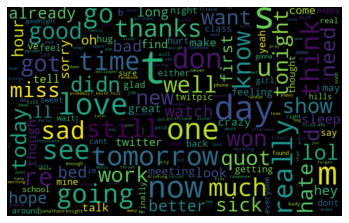

In [9]:
visualizar_dados.visualizar_word_cloud(nuvem_palavras)

## Nuvem palavras **Positivas**

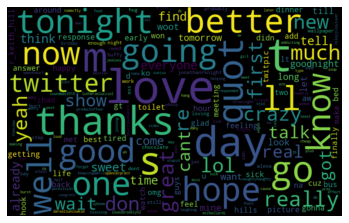

In [10]:
visualizar_dados.visualizar_word_cloud(nuvem_palavras_positivo)

## Nuvem palavras **Negativas**

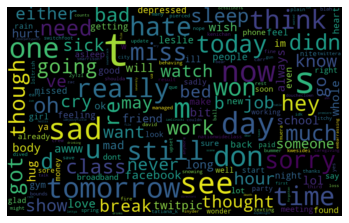

In [11]:
visualizar_dados.visualizar_word_cloud(nuvem_palavras_negativo)

## Separando dados de teste e treinamento

## Remove Stop words

In [12]:
tweets.head()

,Sentimento,Texto,Sentimento_Texto
800000,4,i love health4uandpets u guys r the best,positivo
800001,4,im meeting up with one of my besties tonight ...,positivo
800002,4,darealsunisakim thanks for the twitter add s...,positivo
800003,4,being sick can be really cheap when it hurts t...,positivo
800004,4,lovesbrooklyn2 he has that effect on everyone,positivo


In [13]:
tweets['Texto'] = tratar_dados.remover_stop_words(tweets, 'Texto')


In [14]:
tweets.head()

,Sentimento,Texto,Sentimento_Texto
800000,4,love health4uandpets u guys r best,positivo
800001,4,im meeting one besties tonight cant wait girl ...,positivo
800002,4,darealsunisakim thanks twitter add sunisa got ...,positivo
800003,4,sick really cheap hurts much eat real food plu...,positivo
800004,4,lovesbrooklyn2 effect everyone,positivo


## Visualizar nuvem de palavras após remover Stop Words

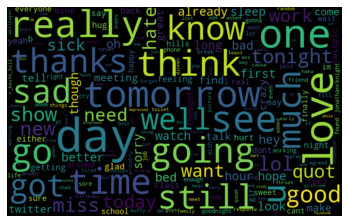

In [15]:
nuvem_palavras = tratar_dados.criar_nuvem_palavras(dados=tweets, campo="Texto")

visualizar_dados.visualizar_word_cloud(nuvem_palavras)


## Visualizar nuvem de palavras após remover abreviações comuns

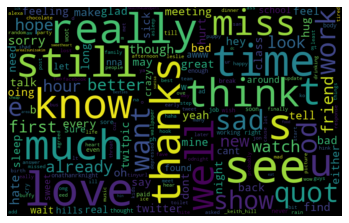

In [16]:
tweets['Texto'] = tweets['Texto'].apply(lambda x: tratar_dados.process_tweets(x))
nuvem_palavras  = tratar_dados.criar_nuvem_palavras(dados=tweets, campo="Texto")

visualizar_dados.visualizar_word_cloud(nuvem_palavras)

## Visualizar Vetorização

In [17]:
vetorizar, bag_of_words = treinamento.vetorizar(tweets, 'Texto')
X_treino, X_teste, y_treino, y_teste= treinamento.separar_dados_treinamento(bag_of_words.toarray(), tweets.Sentimento)


In [18]:
X_treino

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

## 1 - Classificar sentimento (positivo e negativo) na base de tweets a ser fornecida utilizando 3 métodos diferentes: 

## Dois métodos clássicos 


### LogisticRegression

In [19]:
print('X_treino,   X_teste,  y_treino, y_teste')
print(X_treino.shape, X_teste.shape, y_treino.shape, y_teste.shape)


X_treino,   X_teste,  y_treino, y_teste
(140, 50) (60, 50) (140,) (60,)


In [20]:
predicao_regressao = treinamento.logistic_regression(X_treino, y_treino, X_teste, y_teste)
print("Accuracy : %s" % (np.round(accuracy_score(y_teste, predicao_regressao), 4)))

Accuracy : 0.65


### Naive Bayes

In [21]:
predicao_naive_bayes = treinamento.naive_bayes(X_treino, y_treino, X_teste, y_teste)
print("Accuracy : %s" % (np.round(accuracy_score(y_teste, predicao_naive_bayes),4)))

Accuracy : 0.6667


- Um método utilizando deep learning 

In [22]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers


model = deep_learning.definir_modelo(shape=(50,))
deep_learning.compilar_modelo(model)
history = deep_learning.treinar_modelo(model, X_treino, y_treino, X_teste, y_teste)

# model = models.Sequential()
# model.add(layers.Dense(16, activation='relu', input_shape=(50,)))
# model.add(layers.Dense(16, activation='relu'))
# model.add(layers.Dense(1, activation='sigmoid'))

# model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
#               loss='binary_crossentropy',
#               metrics=['accuracy'])

# history = model.fit(X_treino,
#                     y_treino,
#                     epochs=20,
#                     batch_size=512,
#                     validation_data=(X_teste, y_teste))




Epoch 1/20


2021-08-15 16:54:15.801468: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-08-15 16:54:15.801542: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2021-08-15 16:54:15.801596: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (alan-Inspiron-3583): /proc/driver/nvidia/version does not exist
2021-08-15 16:54:15.801951: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-08-15 16:54:15.871914: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the 

1/1 [==============================] - 0s 499ms/step - loss: 0.7889 - accuracy: 0.4071 - val_loss: 0.7176 - val_accuracy: 0.2500
Epoch 2/20
1/1 [==============================] - 0s 15ms/step - loss: 0.7460 - accuracy: 0.2000 - val_loss: 0.6901 - val_accuracy: 0.1667
Epoch 3/20
1/1 [==============================] - 0s 17ms/step - loss: 0.7156 - accuracy: 0.1786 - val_loss: 0.6678 - val_accuracy: 0.1167
Epoch 4/20
1/1 [==============================] - 0s 20ms/step - loss: 0.6911 - accuracy: 0.1500 - val_loss: 0.6483 - val_accuracy: 0.1000
Epoch 5/20
1/1 [==============================] - 0s 22ms/step - loss: 0.6693 - accuracy: 0.0929 - val_loss: 0.6301 - val_accuracy: 0.0667
Epoch 6/20
1/1 [==============================] - 0s 23ms/step - loss: 0.6495 - accuracy: 0.0929 - val_loss: 0.6131 - val_accuracy: 0.0667
Epoch 7/20
1/1 [==============================] - 0s 20ms/step - loss: 0.6311 - accuracy: 0.0857 - val_loss: 0.5968 - val_accuracy: 0.0333
Epoch 8/20
1/1 [=====================

In [23]:
history_dict = history.history
print('Dicionario: ',history_dict.keys(), '\n')

print('Loss:'           ,history_dict['loss'],'\n')
print('Accuracy: '      ,history_dict['accuracy'],'\n')
print('Val Loss:'       ,history_dict['val_loss'],'\n')
print('Val Accuracy:'   ,history_dict['val_accuracy'],'\n')

Dicionario:  dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy']) 

Loss: [0.7888556122779846, 0.7459542751312256, 0.7156199812889099, 0.6910627484321594, 0.6692941188812256, 0.6494786143302917, 0.6310998201370239, 0.6138588190078735, 0.5970646142959595, 0.5805990099906921, 0.5644258260726929, 0.5485901832580566, 0.5331915616989136, 0.5181838870048523, 0.5034465789794922, 0.48905906081199646, 0.47467949986457825, 0.4608375132083893, 0.4471070468425751, 0.4335634112358093] 

Accuracy:  [0.40714284777641296, 0.20000000298023224, 0.1785714328289032, 0.15000000596046448, 0.09285714477300644, 0.09285714477300644, 0.08571428805589676, 0.0714285746216774, 0.0714285746216774, 0.0357142873108387, 0.0357142873108387, 0.0357142873108387, 0.0357142873108387, 0.02857142873108387, 0.02142857201397419, 0.014285714365541935, 0.014285714365541935, 0.014285714365541935, 0.0071428571827709675, 0.0071428571827709675] 

Val Loss: [0.7176054120063782, 0.6901399493217468, 0.6677817702293396, 0.6482503

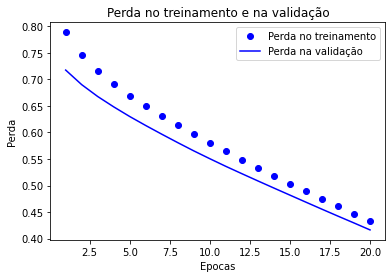

In [24]:
loss, val_loss, acc, val_acc = visualizar_dados.valor_accuracia(history_dict)

epochs = range(1, len(acc) + 1)
linhas = [[loss, 'bo', 'Perda no treinamento'],
          [val_loss, 'b', 'Perda na validação']]
titulos = {'title': 'Perda no treinamento e na validação',
           'xlabel': 'Epocas',
           'ylabel': 'Perda'
           }

visualizar_dados.visualizar_accuracia(epochs, linhas, titulos)


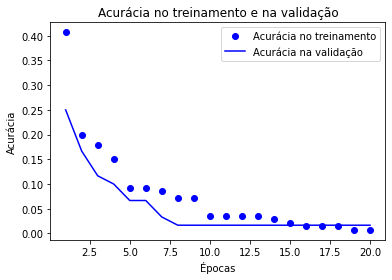

In [25]:
linhas = [[acc, 'bo', 'Acurácia no treinamento'],
          [val_acc, 'b', 'Acurácia na validação']]
titulos = {'title': 'Acurácia no treinamento e na validação',
           'xlabel': 'Épocas',
           'ylabel': 'Acurácia'
           }
visualizar_dados.visualizar_accuracia(epochs, linhas, titulos)


In [26]:
predito = model.predict(X_teste)
print(predito)

# Real
print(y_teste)

[[0.5802851 ]
 [0.5123419 ]
 [0.52196753]
 [0.5251704 ]
 [0.5251704 ]
 [0.5293291 ]
 [0.5251704 ]
 [0.5366698 ]
 [0.53839713]
 [0.5363252 ]
 [0.5532266 ]
 [0.5251704 ]
 [0.52431047]
 [0.538264  ]
 [0.54062337]
 [0.5251704 ]
 [0.58959085]
 [0.5622384 ]
 [0.5251704 ]
 [0.5251704 ]
 [0.53372145]
 [0.5242811 ]
 [0.5445304 ]
 [0.51947373]
 [0.54693705]
 [0.556309  ]
 [0.51249695]
 [0.5251704 ]
 [0.5251704 ]
 [0.5662491 ]
 [0.5251704 ]
 [0.5251704 ]
 [0.53839713]
 [0.5964451 ]
 [0.5251704 ]
 [0.5251704 ]
 [0.48670688]
 [0.52480316]
 [0.52431047]
 [0.55615175]
 [0.5771415 ]
 [0.52431047]
 [0.53187215]
 [0.55009186]
 [0.5251704 ]
 [0.5332624 ]
 [0.5251704 ]
 [0.5275187 ]
 [0.5445304 ]
 [0.5251704 ]
 [0.5493379 ]
 [0.5251704 ]
 [0.608027  ]
 [0.53307307]
 [0.5251704 ]
 [0.5251704 ]
 [0.556309  ]
 [0.5771415 ]
 [0.52131987]
 [0.5463692 ]]
800095    4
800015    4
800030    4
58        0
28        0
15        0
800069    4
70        0
74        0
800045    4
800066    4
82        0
65        0
800

## 2 - Um método consiste em uma forma de vetorização (Contagem, vetor binário, TF-IDF, Embeddings, etc.) e um classificador 


### Matriz Esparsa

In [27]:
# vetorizar, bag_of_words = treinamento.vetorizar(tweets)
matriz_esparsa = treinamento.criar_matriz_esparsa(bag_of_words, vetorizar)

matriz_esparsa

,bad,bed,better,class,dont,feeling,glad,great,hate,hey,...,till,time,twitpic,twitter,wait,want,watch,work,working,yeah
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
196,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
197,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
198,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


### Contagem

In [38]:
count_words = tratar_dados.contar_palavras(tweets)
count_words_positivo    = tratar_dados.contar_palavras(tweets.query("Sentimento_Texto == 'positivo'"))
count_words_negativo    = tratar_dados.contar_palavras(tweets.query("Sentimento_Texto == 'negativo'"))
count_words_neutro      = tratar_dados.contar_palavras(tweets.query("Sentimento_Texto == 'neutro'"))

print('Contagem Positivos:',count_words_positivo)
print('Contagem Negativos:',count_words_negativo)
print('Contagem Neutros:',count_words_neutro)

#calculo da razão com smoothing (add-one)
ratio_pos = (count_words_positivo + 1) / (count_words_negativo + 1)
ratio_neg = (count_words_negativo + 1) / (count_words_positivo + 1)

print('ratio_pos, ratio_neg:', ratio_pos, ratio_neg)

Contagem Positivos: 780
Contagem Negativos: 750
Contagem Neutros: 0
ratio_pos, ratio_neg: 1.0399467376830893 0.9615877080665813


### TF-IDF

### Geral

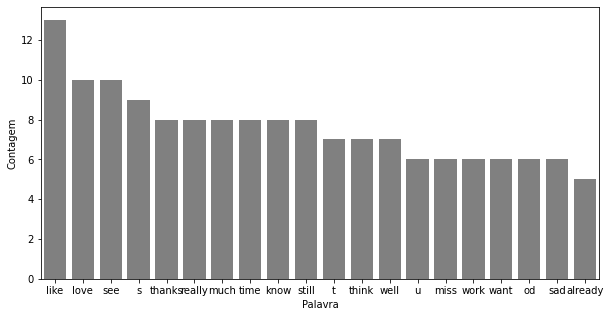

In [29]:
visualizar_dados.pareto(tweets, 'Texto', 20)

### Positivos

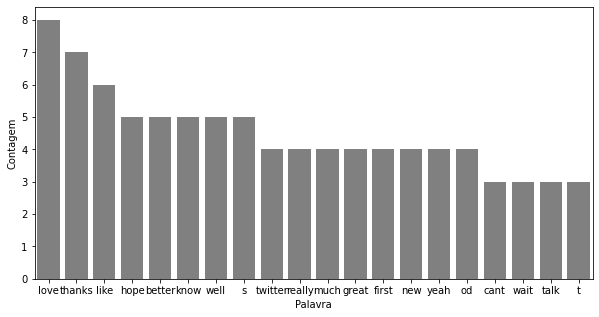

In [30]:
visualizar_dados.pareto(tweets.query("Sentimento_Texto == 'positivo'"), 'Texto', 20)

### Negativos

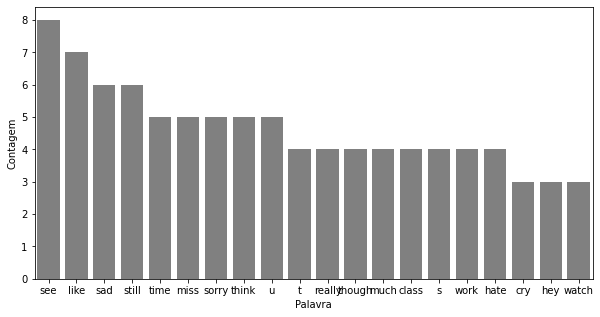

In [31]:
visualizar_dados.pareto(tweets.query("Sentimento_Texto == 'negativo'"), 'Texto', 20)

## 3 - O grupo deverá comentar um pouco sobre os métodos utilizados (comentar sobre a vetorização e sobre o classificador) e fazer uma análise de cada método: 

In [32]:
classificacao_reg, score_reg = treinamento.metricas(y_teste, predicao_regressao)
print("Regressão Logistica")
print("Classificação: \n", classificacao_reg)
print("Score:", score_reg)
print("\n")

classificacao_nb, score_nb = treinamento.metricas(y_teste, predicao_naive_bayes)
print("Naive Bayes")
print("Classificação: \n", classificacao_reg)
print("Score:", score_reg)

Regressão Logistica
Classificação: 
               precision    recall  f1-score   support

           0       0.59      0.90      0.71        29
           4       0.81      0.42      0.55        31

    accuracy                           0.65        60
   macro avg       0.70      0.66      0.63        60
weighted avg       0.71      0.65      0.63        60

Score: 0.6579532814238043


Naive Bayes
Classificação: 
               precision    recall  f1-score   support

           0       0.59      0.90      0.71        29
           4       0.81      0.42      0.55        31

    accuracy                           0.65        60
   macro avg       0.70      0.66      0.63        60
weighted avg       0.71      0.65      0.63        60

Score: 0.6579532814238043


## 4 - Fazer comparativo dos métodos utilizando os critérios acima. 
Qual o melhor? 
O que pode melhorar? 
Quais as vantagens e desvantagens de cada método. 

## 5 - O trabalho deve ser obrigatoriamente apresentado. Haverá sorteio do dia da apresentação e a ordem. 
No dia da apresentação, o grupo terá 15 min para apresentar o trabalho (será utilizado compartilhamento de tela com o grupo).

O grupo pode utilizar qualquer recurso para facilitar a apresentação (slides, trechos de códigos, etc.)